In [1]:
import statfin
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [15]:
from local import *
DATA = Data("HVT_TULOT_70")

In [17]:
df = DATA.table.values["Erä"]
df[df.text.str.contains("Ansio")]

,code,text
6,HVT_TULOT_70,4. Ansiotulot yhteensä
63,HVT_TULOT_510,4.11 Ansiotulona verotetut osingot (listaamatt...
64,HVT_TULOT_520,4.12 Ansiotulona verotetut ylijäämät (listaama...
68,HVT_TULOT_2370,4.13.3 Ansiotulona verotetut osingot ulkomailta


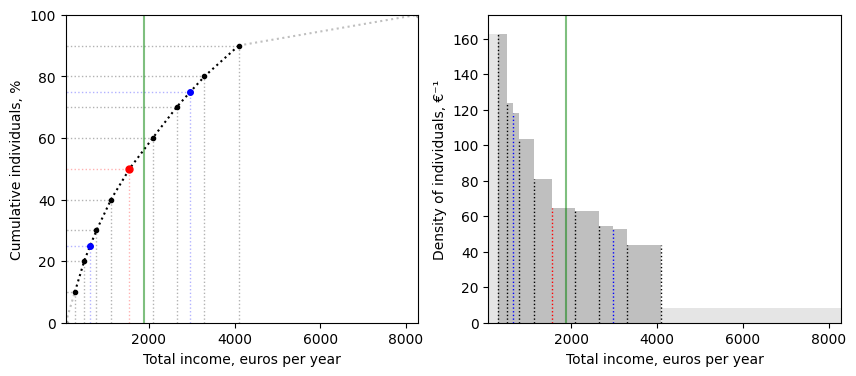

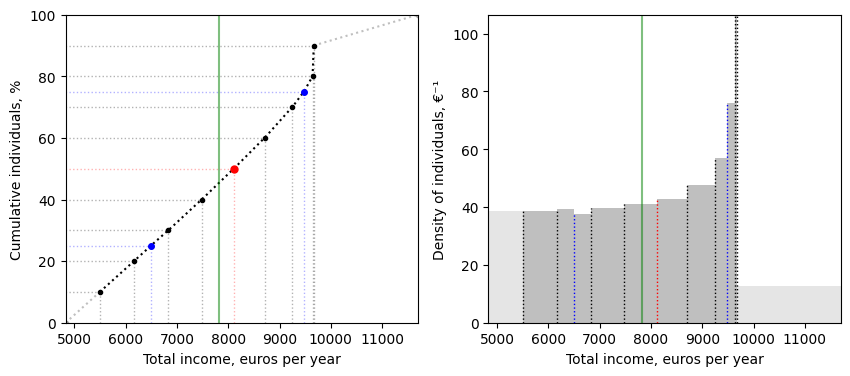

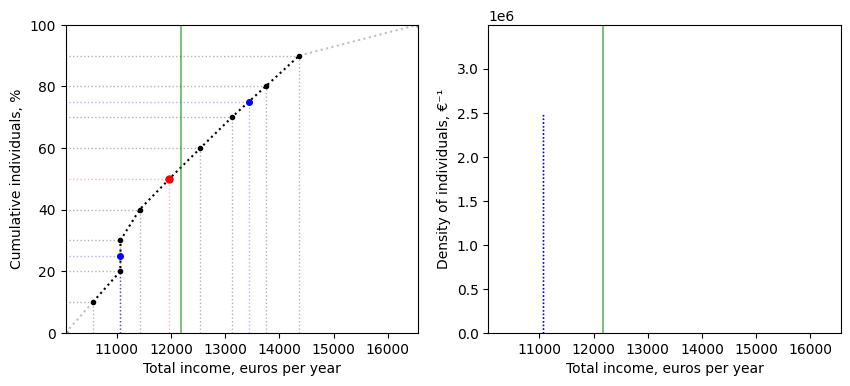

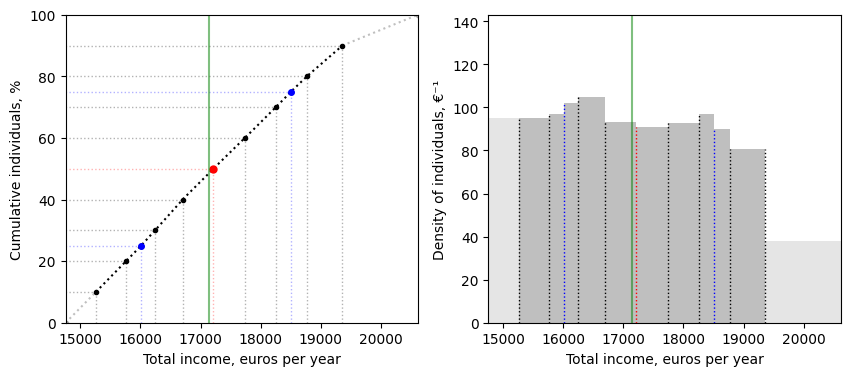

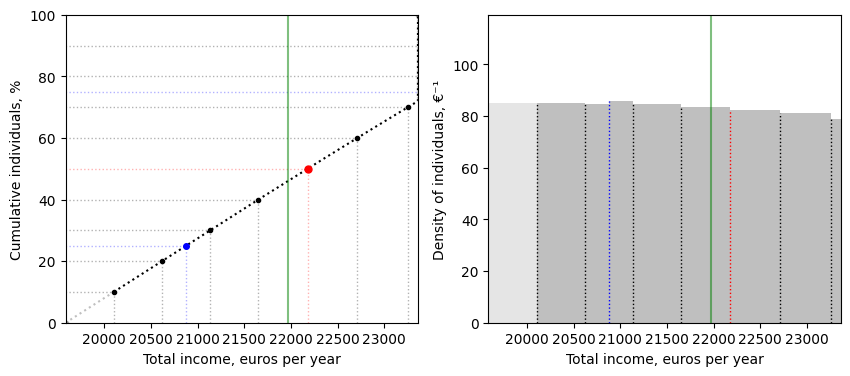

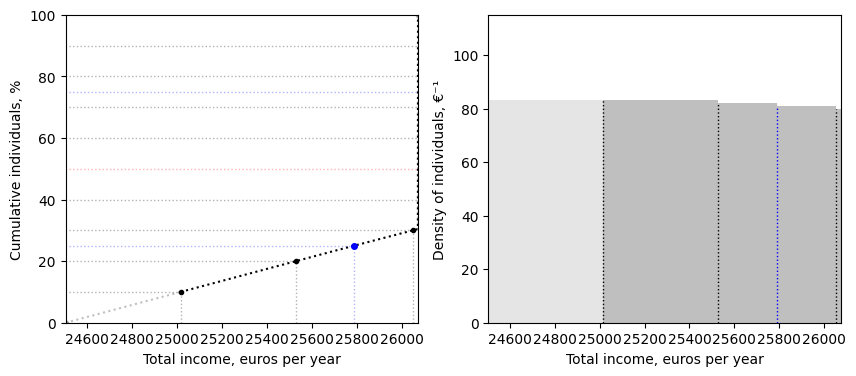

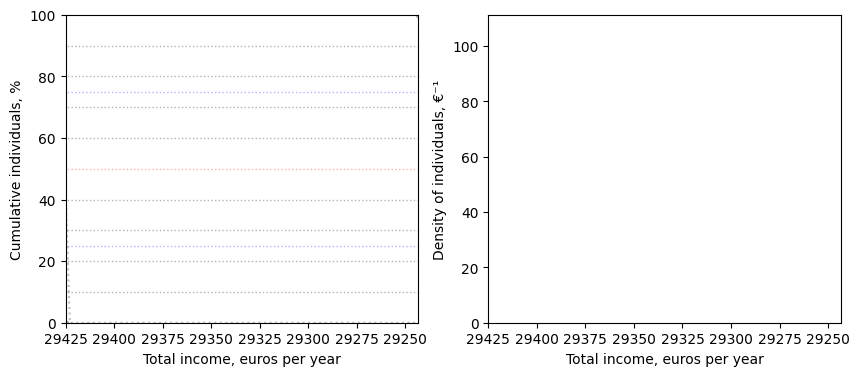

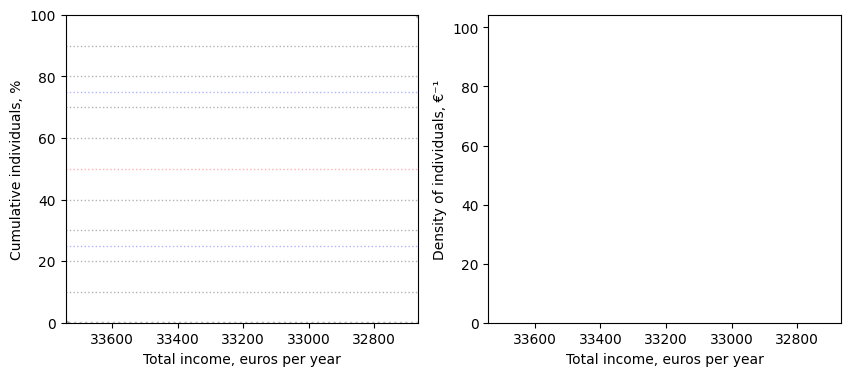

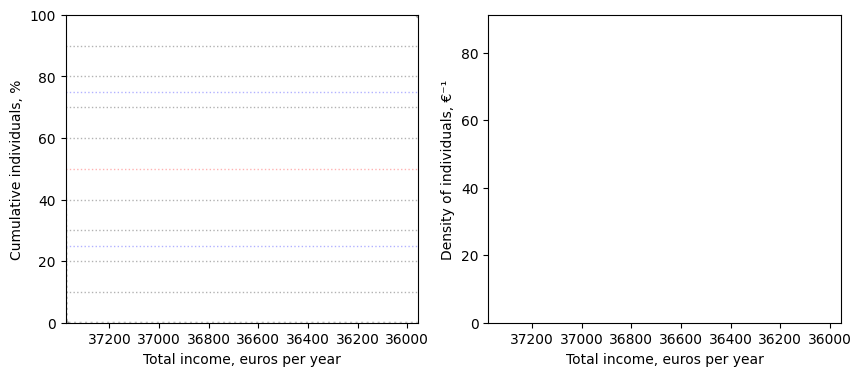

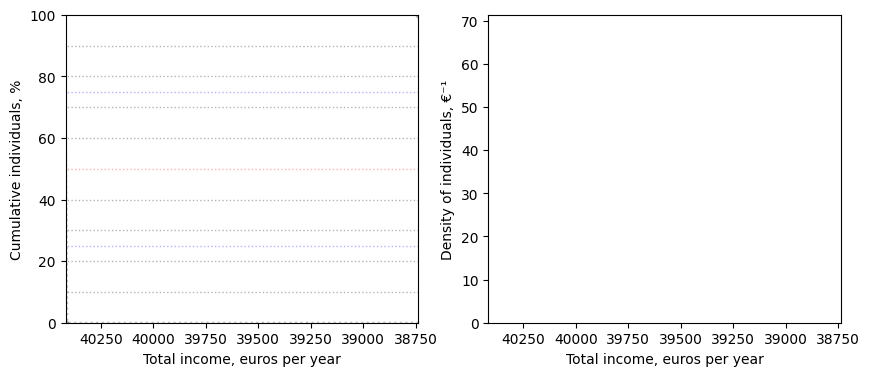

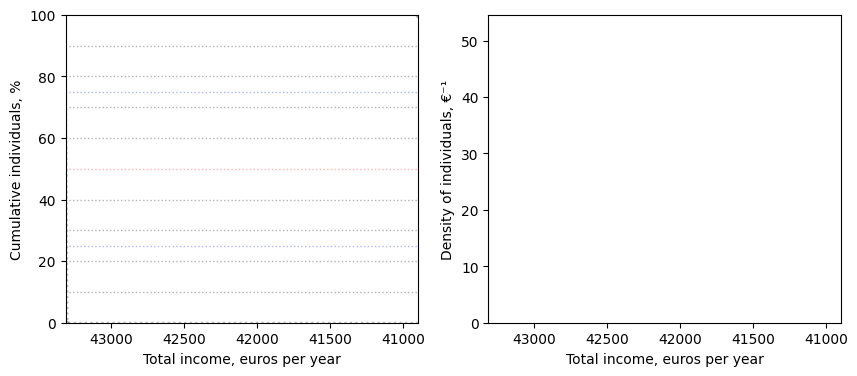

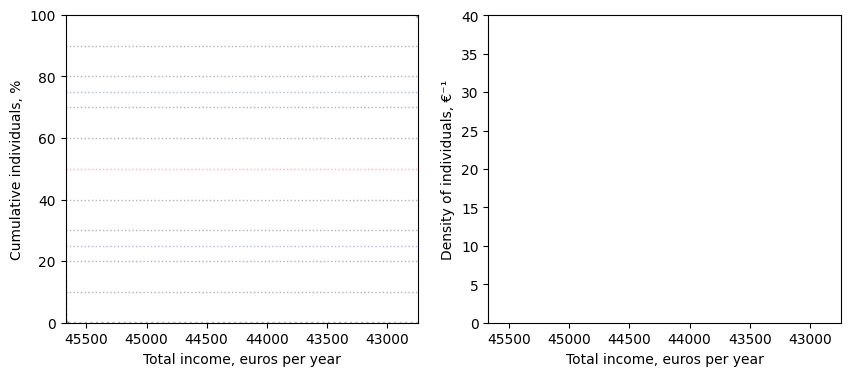

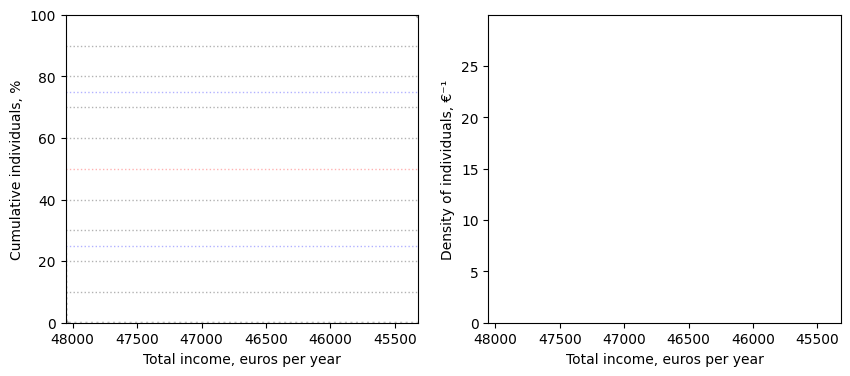

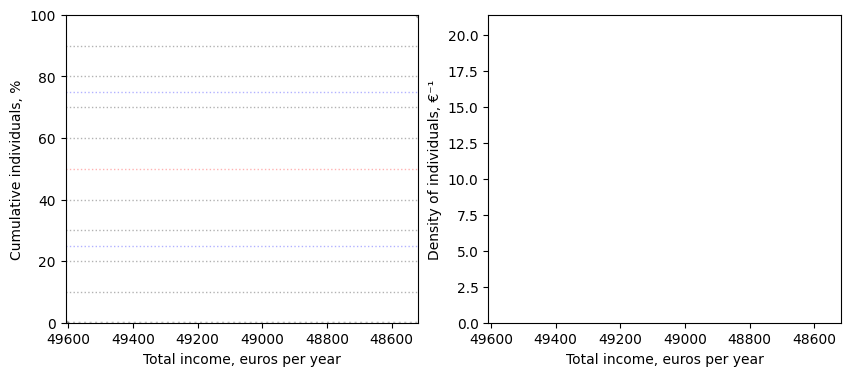

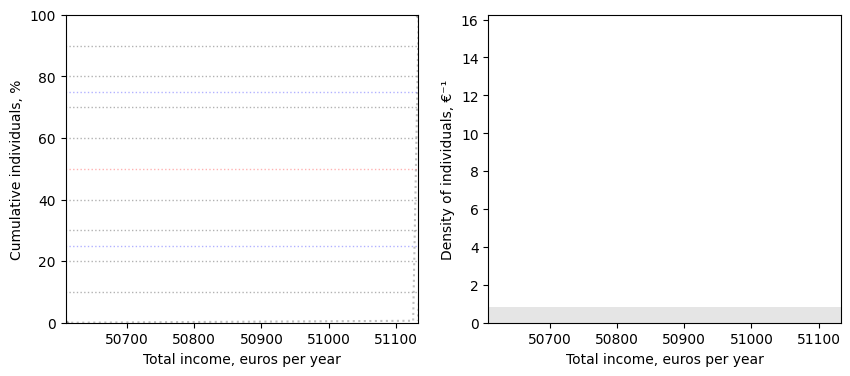

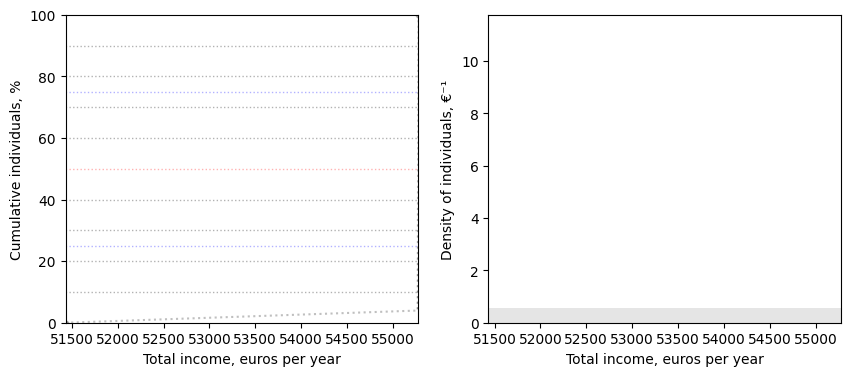

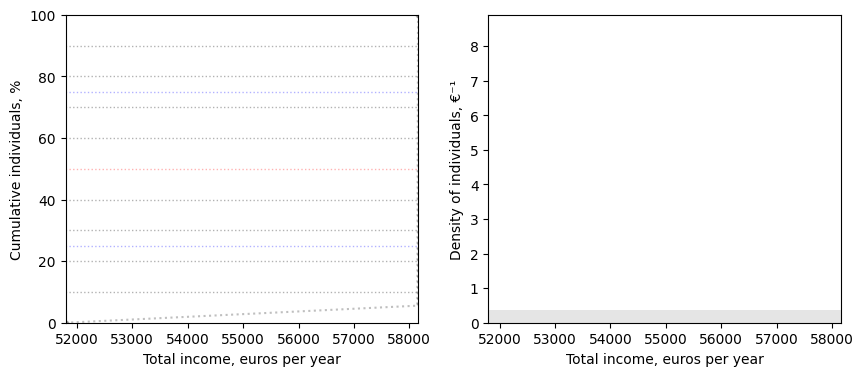

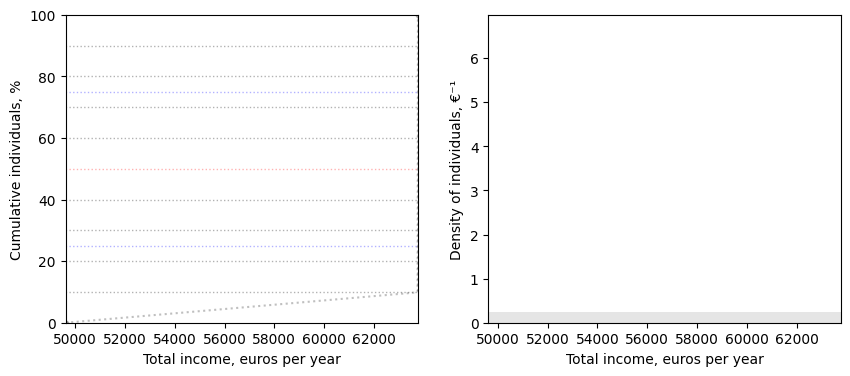

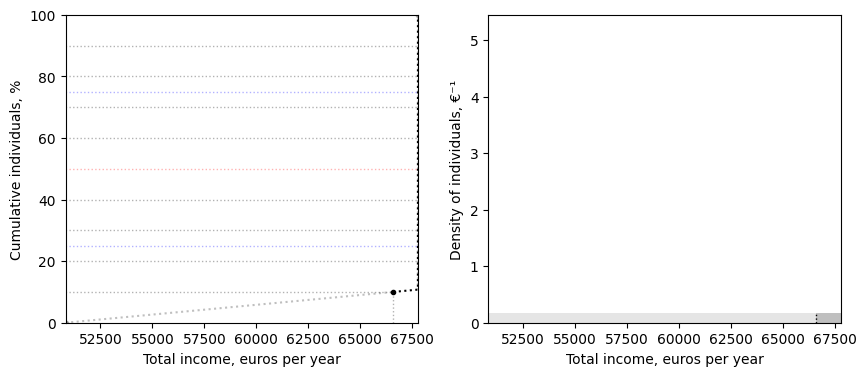

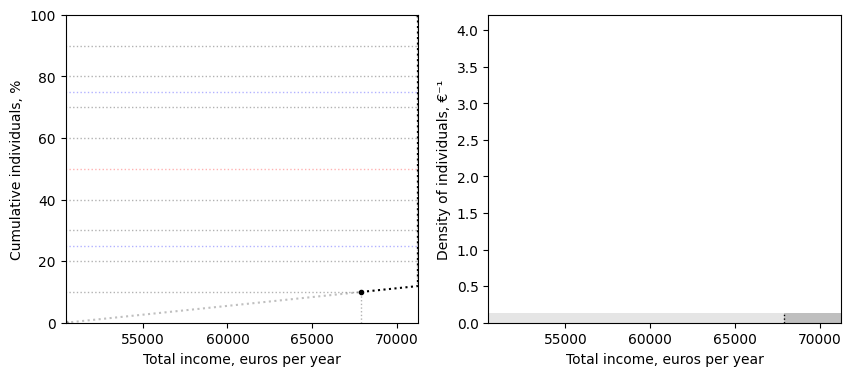

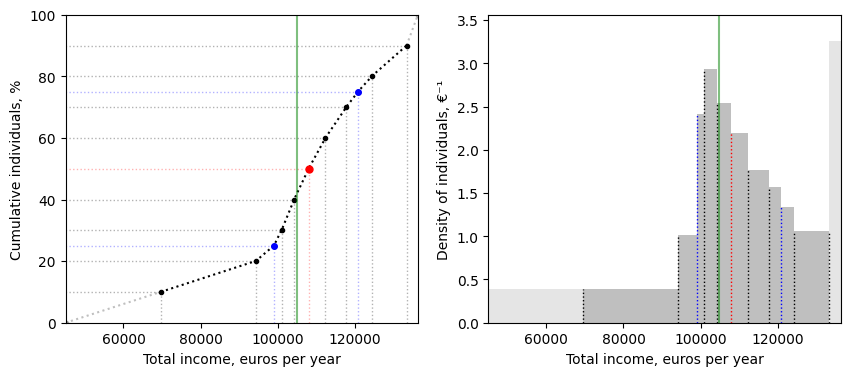

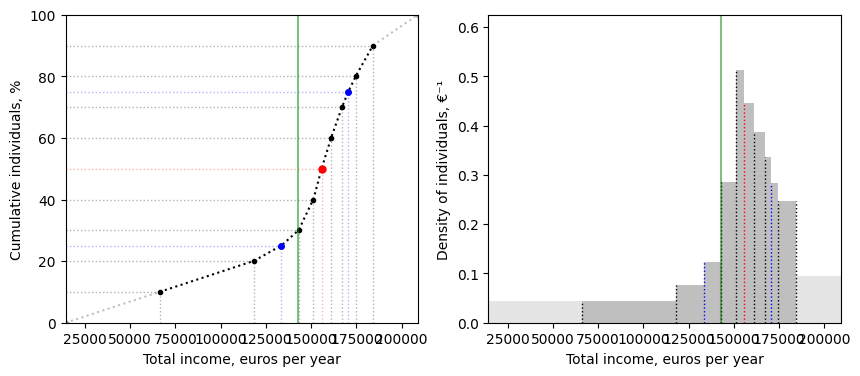

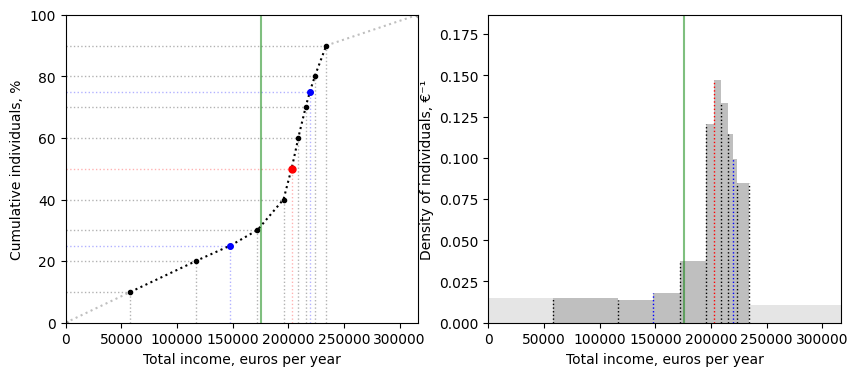

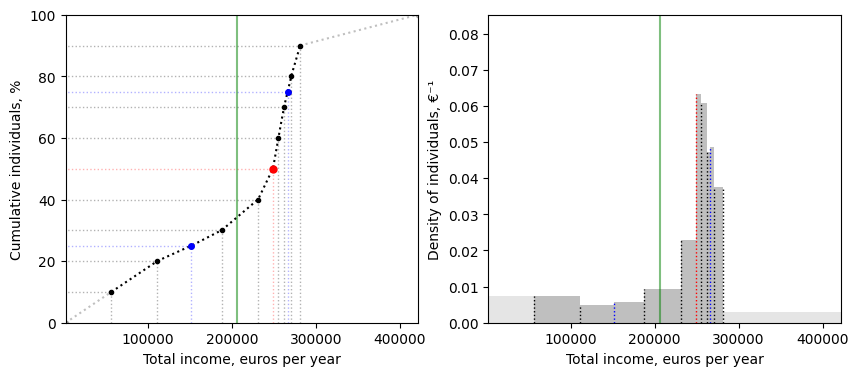

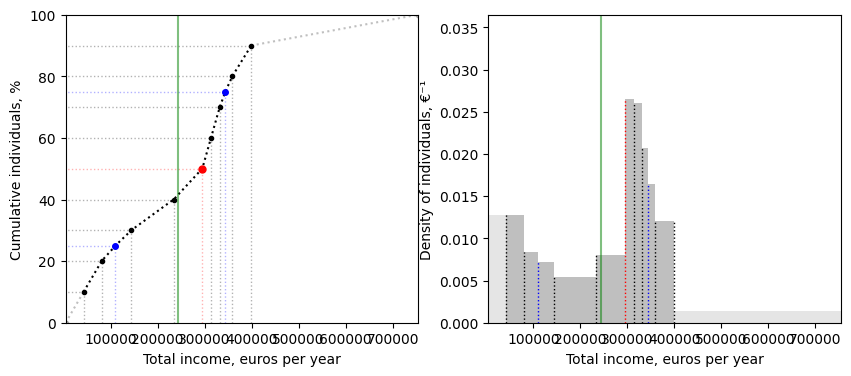

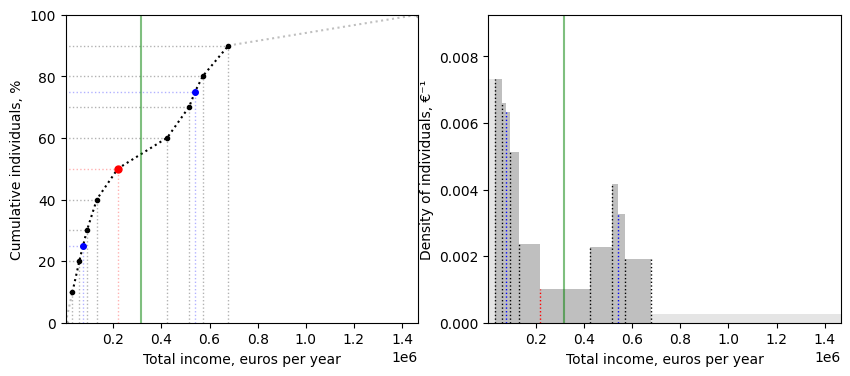

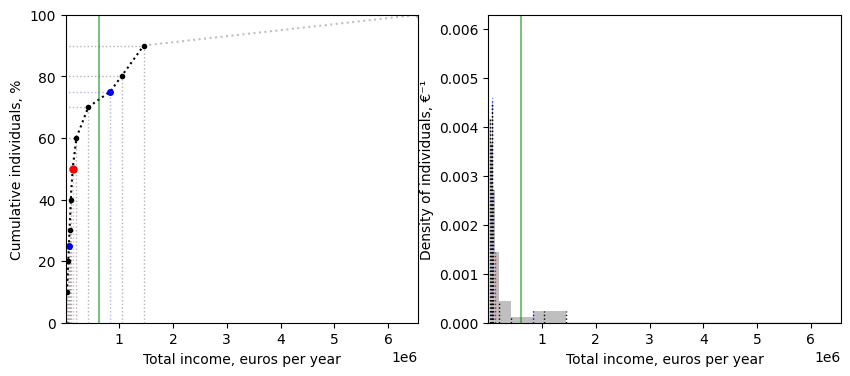

In [16]:
for i in range(1, 28):
    row = DATA.row(i)
    chunk = Chunk(row)
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    x = np.linspace(chunk.vmin, chunk.vmax, 10_000)
    #axs[0].plot(x, chunk.cumulative(x))
    plot_cumulative_2(axs[0], chunk)
    plot_density(axs[1], row, chunk.vmin, chunk.vmax)
    plt.show()

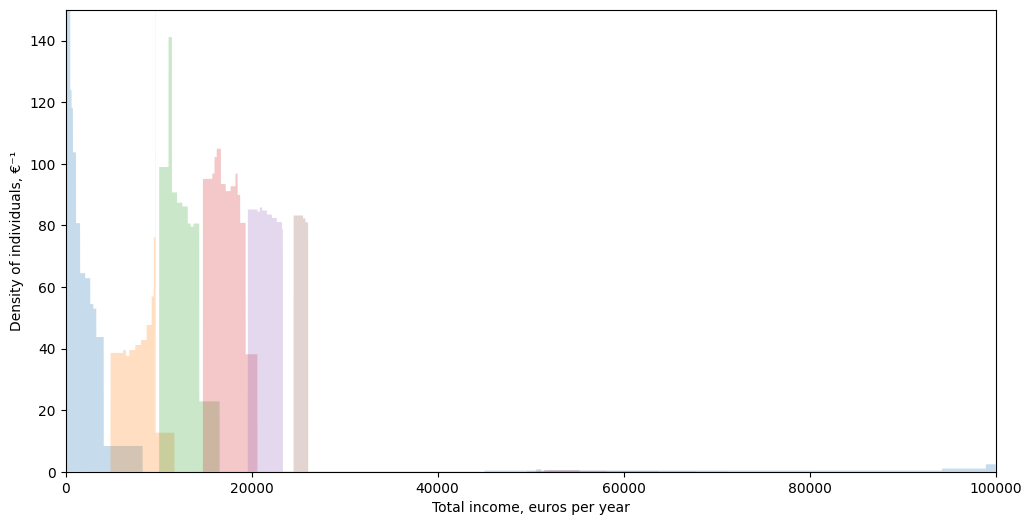

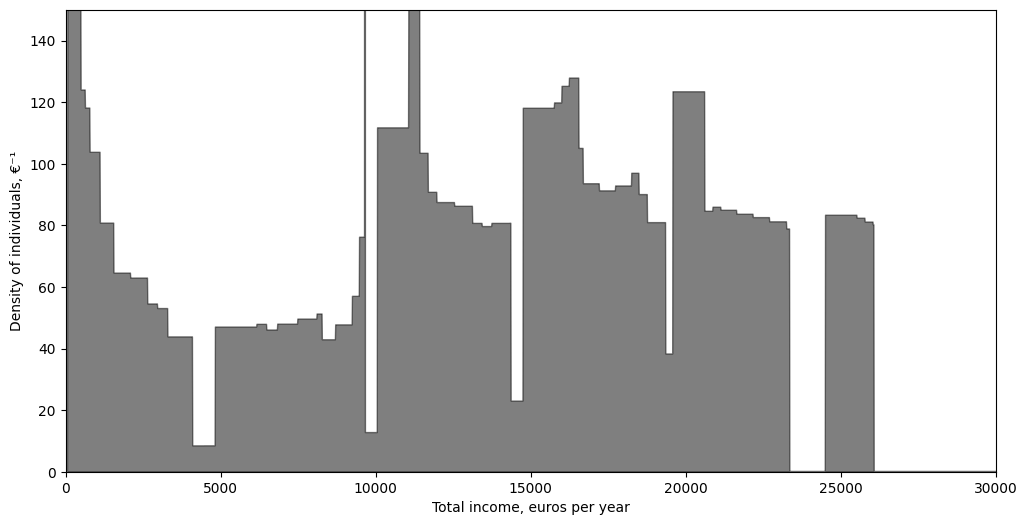

In [18]:
plt.figure(figsize=(12, 6))
x = np.linspace(0_000, 100_000, 10_000)
Y = 0.0 * x

for i in range(1, 28):
    row = DATA.row(i)
    chunk = Chunk(row)
    y = chunk.density(x)
    Y += y
    plt.fill_between(x, y, alpha=0.25)
#plt.plot(x, Y, color="k", alpha=0.5)
plt.ylim(0, 150)
plt.xlim(0, 100_000)
plt.xlabel("Total income, euros per year")
plt.ylabel("Density of individuals, €⁻¹")
plt.savefig("density_bits.png", dpi=300, transparent=True)
plt.show()

plt.figure(figsize=(12, 6))
plt.fill_between(x, Y, color="k", alpha=0.5)
plt.ylim(0, 150)
plt.xlim(0, 30_000)
plt.xlabel("Total income, euros per year")
plt.ylabel("Density of individuals, €⁻¹")
plt.savefig("density.png", dpi=300, transparent=True)

20 000 – 24 999


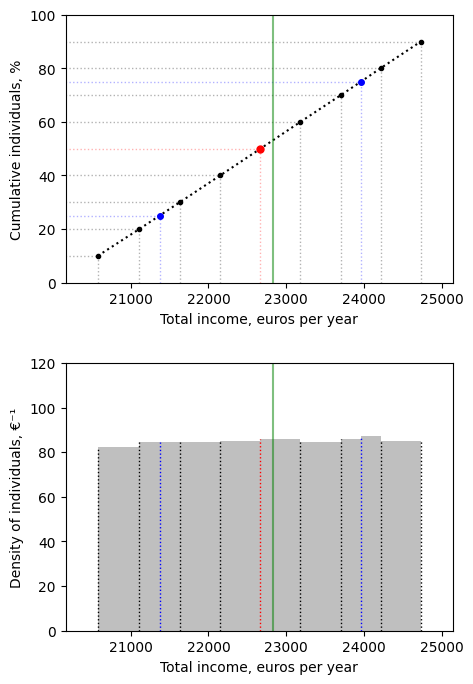

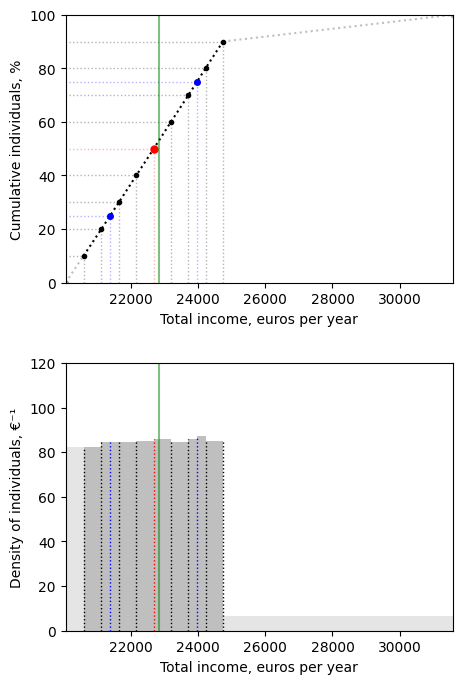

In [4]:
def draw(i):
    row = DATA.row(i)
    print(DATA.income_class_name(row.raw.Tuloluokka))

    fig, (ax, bx) = plt.subplots(2, 1, figsize=(5, 8))
    fig.subplots_adjust(hspace=0.3)
    plot_cumulative(ax, row)
    plot_density(bx, row)
    fig.savefig(f"example.{row.raw.Tuloluokka}.png", dpi=300, transparent=True)
    plt.show()
    
    fig, (ax, bx) = plt.subplots(2, 1, figsize=(5, 8))
    fig.subplots_adjust(hspace=0.3)
    l = row.v[0] - (row.v[1] - row.v[0])
    r = row.l2r(l)
    plot_cumulative(ax, row, l, r)
    plot_density(bx, row, l, r)
    fig.savefig(f"example.ext.{row.raw.Tuloluokka}.png", dpi=300, transparent=True)
    plt.show()

draw(5)